In [1]:
import pickle as pkl

import lxml
import pandas as pd
import numpy as np
#import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.datasets import imdb


from tqdm.notebook import tqdm

from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, f1_score
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Activation, Dropout, Conv1D, Flatten, MaxPooling1D,\
                        AveragePooling1D, Concatenate, LeakyReLU, Embedding,\
                        GlobalMaxPooling1D,GlobalAveragePooling1D,GaussianNoise,BatchNormalization,Add
from tensorflow.keras.initializers import glorot_uniform
#from tensorflow.keras.utils.vis_utils import plot_model

import importlib
importlib.reload(tensorflow)

<module 'tensorflow' from '/miniconda/lib/python3.6/site-packages/tensorflow/__init__.py'>

In [2]:
tqdm.pandas()

In [3]:
import tensorflow as tf
with tf.Session() as sess:
    devices = sess.list_devices()

In [4]:
import sys

In [5]:
!{sys.executable} -m list

/miniconda/bin/python: No module named list


# Load NDM DTC Interactions

In [7]:
ndm_df = pd.read_pickle('data/DTC_NDM_gene_seq_fingerprint.pkl')

In [8]:
ndm_df

,CHEMBL_id,InChi_Key,gene_seq,gene_name,fingerprint
0,CHEMBL418746,AAKDPDFZMNYDLR-UHFFFAOYSA-N,TTGAGCCTTTTCAGCAAGCTTAAAGAAGGTTTAAATAAGACGCGGC...,GAA,2246728737 3657471097 2092489639 2014255590 29...
1,CHEMBL418746,AAKDPDFZMNYDLR-UHFFFAOYSA-N,TTGAGCCTTTTCAGCAAGCTTAAAGAAGGTTTAAATAAGACGCGGC...,GAA,2246728737 3657471097 2092489639 2014255590 29...
2,CHEMBL418746,AAKDPDFZMNYDLR-UHFFFAOYSA-N,TTGTTGAAGCATGTGGTTACCCTGATACCGGGTGATGGTACTGGCC...,FUCA1,2246728737 3657471097 2092489639 2014255590 29...
3,CHEMBL1484869,AAOFJKLTRKOQTQ-UHFFFAOYSA-N,ATGGATGTAATTAAACAAGCTTTAGAGAGGATGGGCTATGCCGCTG...,CYP3A4,2246728737 422715066 3217380708 3120642300 321...
4,CHEMBL1484869,AAOFJKLTRKOQTQ-UHFFFAOYSA-N,ATGGATGTAATTAAACAAGCTTTAGAGAGGATGGGCTATGCCGCTG...,CYP3A4,2246728737 422715066 3217380708 3120642300 321...
...,...,...,...,...,...
31453,CHEMBL186200,NaN,GTGATCTTCCTGGCGAAAACAAAAGAGCGCTTTGTCTGCCAGCAAT...,CA2,848127915 88330248 864942730 2378779377 864942...
31454,CHEMBL1200739,NaN,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,CA1,1026822558
31455,CHEMBL186200,NaN,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,CA1,848127915 88330248 864942730 2378779377 864942...
31456,CHEMBL186200,NaN,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,CA1,848127915 88330248 864942730 2378779377 864942...


In [9]:
gene_seq_list = ndm_df['gene_seq'].tolist()
gene_seq_len_list = []

for gene_name in gene_seq_list:
    gene_seq_len_list.append(len(gene_name))
    
gene_seq_len_list

[936,
 936,
 1011,
 933,
 933,
 1062,
 1062,
 756,
 756,
 1734,
 1440,
 1050,
 1050,
 1011,
 1011,
 345,
 345,
 471,
 471,
 264,
 264,
 2292,
 537,
 537,
 492,
 492,
 519,
 519,
 1926,
 1926,
 867,
 867,
 1101,
 1101,
 228,
 228,
 858,
 858,
 750,
 750,
 1239,
 1239,
 696,
 1116,
 1116,
 1362,
 1362,
 561,
 561,
 684,
 684,
 1170,
 279,
 279,
 396,
 396,
 822,
 822,
 687,
 687,
 1386,
 1386,
 465,
 465,
 843,
 843,
 360,
 360,
 330,
 330,
 201,
 201,
 546,
 546,
 1074,
 1074,
 465,
 465,
 405,
 405,
 405,
 405,
 930,
 930,
 930,
 228,
 228,
 1143,
 1143,
 642,
 642,
 75,
 75,
 1704,
 1704,
 1152,
 393,
 393,
 393,
 1902,
 1902,
 780,
 780,
 372,
 933,
 933,
 168,
 168,
 294,
 294,
 426,
 426,
 201,
 201,
 285,
 285,
 1170,
 1170,
 675,
 675,
 1284,
 1284,
 321,
 321,
 225,
 225,
 1098,
 1098,
 2079,
 2079,
 2163,
 2163,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 174,
 1368,
 1368,
 507,
 507,
 459,
 924,
 76,
 76,
 76,
 1482,
 1482,
 1368,
 1368,
 483,
 483,
 19

Text(0,0.5,'Number of Genes')

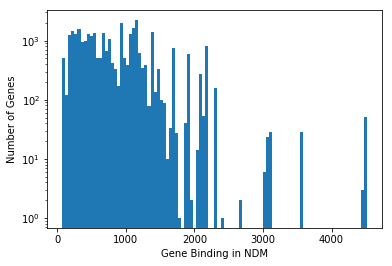

In [45]:
plt.hist(gene_seq_len_list, bins = 100, log = True)
plt.xlabel('Gene Binding in NDM')
plt.ylabel('Number of Genes')

# Preparing data

In [11]:
ndm_df['target_gene_code'] = ndm_df['gene_seq'] #.apply(lambda x: ''.join(list(x.split('\n')[1:])))
#drugbank['target_amino_code'] = drugbank['target_amino'].apply(lambda x: ''.join(list(x.split('\n')[1:])))

In [17]:
#ndm_df = ndm_df[['cid', 'fingerprint']].drop_duplicates('cid')

#### Preprocessing fingerprints to feed to CNN

In [12]:
label_encoder = LabelEncoder()
label_encoder = pd.read_pickle('data/gene_encoder.pkl')
#label_encoder.fit(list(corona_gene_df['target_gene_code'].iloc[0]))

#with open('data/gene_encoder.pkl', 'wb') as f:
#    pkl.dump(label_encoder, f)
    
gene_chars = set(list(ndm_df['target_gene_code'].iloc[0]))

ndm_df['target_gene_encoded'] = ndm_df['target_gene_code'].progress_apply(\
                                   lambda x: label_encoder.transform([i for i in list(x) if i in gene_chars]))
ndm_df['drug_fingerprint_encoded'] = ndm_df['fingerprint'].progress_apply(lambda x: [int(i) for i in x.replace(' ', '')])

#### Calculate length mismatches and pad

In [15]:
ndm_df['target_gene_encoded_len'] = ndm_df['target_gene_encoded']\
                                    .apply(lambda x: len(x))
ndm_df['drug_fingerprint_encoded_len'] = ndm_df['drug_fingerprint_encoded']\
                                    .apply(lambda x: len(x))

In [16]:
max_target_gene_encoded_len = max(ndm_df['target_gene_encoded_len'])
max_drug_fingerprint_encoded_len = max(ndm_df['drug_fingerprint_encoded_len'])

In [17]:
ndm_df['target_gene_encoded_mismatch'] = max_target_gene_encoded_len - ndm_df['target_gene_encoded_len']

In [18]:
ndm_df['drug_fingerprint_encoded_mismatch'] = max_drug_fingerprint_encoded_len - ndm_df['drug_fingerprint_encoded_len'] 

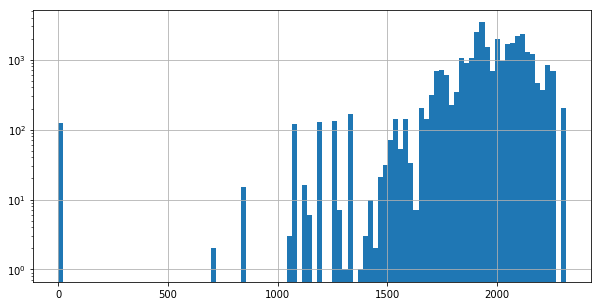

In [19]:
ndm_df['drug_fingerprint_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

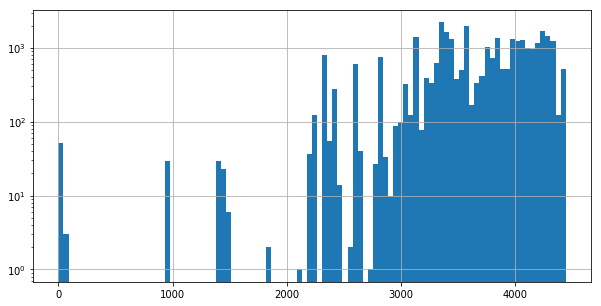

In [20]:
ndm_df['target_gene_encoded_mismatch'].hist(bins = 100, figsize = (10, 5), log = True)

In [21]:
max_target_gene_encoded_len

4512

In [22]:
ndm_df['target_gene_encoded'][0].shape

(936,)

In [23]:
ndm_df['target_gene_encoded_padded'] = ndm_df[['target_gene_encoded','target_gene_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['target_gene_encoded_mismatch']/2))] +   
                                                        list(x['target_gene_encoded']) +
                                                        ['-1' for i in range (int(x['target_gene_encoded_mismatch']/2))]
                                                        , axis = 1)
ndm_df['target_gene_encoded_padded'] = ndm_df['target_gene_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_target_gene_encoded_len else x)

In [24]:
ndm_df['drug_fingerprint_encoded_padded'] = ndm_df[['drug_fingerprint_encoded','drug_fingerprint_encoded_mismatch']]\
                                         .progress_apply(lambda x: ['-1' for i in range(int(x['drug_fingerprint_encoded_mismatch']/2))] +   
                                                        list(x['drug_fingerprint_encoded']) +
                                                        ['-1' for i in range (int(x['drug_fingerprint_encoded_mismatch']/2))]
                                                        , axis = 1)

ndm_df['drug_fingerprint_encoded_padded'] = ndm_df['drug_fingerprint_encoded_padded'].apply(lambda x: x + ['-1'] if len(x) < max_drug_fingerprint_encoded_len else x)

In [25]:
ndm_df.to_csv('data/intermediate/DTC_NDM_Inetracton_Processed.csv')
#corona_gene_df.to_csv('data/intermediate/330_corona_genes_preprocessed.csv')

In [26]:
ndm_df

,CHEMBL_id,InChi_Key,gene_seq,gene_name,fingerprint,target_gene_code,target_gene_encoded,drug_fingerprint_encoded,target_gene_encoded_len,drug_fingerprint_encoded_len,target_gene_encoded_mismatch,drug_fingerprint_encoded_mismatch,target_gene_encoded_padded,drug_fingerprint_encoded_padded
0,CHEMBL418746,AAKDPDFZMNYDLR-UHFFFAOYSA-N,TTGAGCCTTTTCAGCAAGCTTAAAGAAGGTTTAAATAAGACGCGGC...,GAA,2246728737 3657471097 2092489639 2014255590 29...,TTGAGCCTTTTCAGCAAGCTTAAAGAAGGTTTAAATAAGACGCGGC...,"[3, 3, 2, 0, 2, 1, 1, 3, 3, 3, 3, 1, 0, 2, 1, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 6, 5, 7, 4, ...",936,231,3576,2091,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
1,CHEMBL418746,AAKDPDFZMNYDLR-UHFFFAOYSA-N,TTGAGCCTTTTCAGCAAGCTTAAAGAAGGTTTAAATAAGACGCGGC...,GAA,2246728737 3657471097 2092489639 2014255590 29...,TTGAGCCTTTTCAGCAAGCTTAAAGAAGGTTTAAATAAGACGCGGC...,"[3, 3, 2, 0, 2, 1, 1, 3, 3, 3, 3, 1, 0, 2, 1, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 6, 5, 7, 4, ...",936,231,3576,2091,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
2,CHEMBL418746,AAKDPDFZMNYDLR-UHFFFAOYSA-N,TTGTTGAAGCATGTGGTTACCCTGATACCGGGTGATGGTACTGGCC...,FUCA1,2246728737 3657471097 2092489639 2014255590 29...,TTGTTGAAGCATGTGGTTACCCTGATACCGGGTGATGGTACTGGCC...,"[3, 3, 2, 3, 3, 2, 0, 0, 2, 1, 0, 3, 2, 3, 2, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 3, 6, 5, 7, 4, ...",1011,231,3501,2091,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
3,CHEMBL1484869,AAOFJKLTRKOQTQ-UHFFFAOYSA-N,ATGGATGTAATTAAACAAGCTTTAGAGAGGATGGGCTATGCCGCTG...,CYP3A4,2246728737 422715066 3217380708 3120642300 321...,ATGGATGTAATTAAACAAGCTTTAGAGAGGATGGGCTATGCCGCTG...,"[0, 3, 2, 2, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",933,292,3579,2030,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
4,CHEMBL1484869,AAOFJKLTRKOQTQ-UHFFFAOYSA-N,ATGGATGTAATTAAACAAGCTTTAGAGAGGATGGGCTATGCCGCTG...,CYP3A4,2246728737 422715066 3217380708 3120642300 321...,ATGGATGTAATTAAACAAGCTTTAGAGAGGATGGGCTATGCCGCTG...,"[0, 3, 2, 2, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 0, ...","[2, 2, 4, 6, 7, 2, 8, 7, 3, 7, 4, 2, 2, 7, 1, ...",933,292,3579,2030,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31453,CHEMBL186200,NaN,GTGATCTTCCTGGCGAAAACAAAAGAGCGCTTTGTCTGCCAGCAAT...,CA2,848127915 88330248 864942730 2378779377 864942...,GTGATCTTCCTGGCGAAAACAAAAGAGCGCTTTGTCTGCCAGCAAT...,"[2, 3, 2, 0, 3, 1, 3, 3, 1, 1, 3, 2, 2, 1, 2, ...","[8, 4, 8, 1, 2, 7, 9, 1, 5, 8, 8, 3, 3, 0, 2, ...",1368,74,3144,2248,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
31454,CHEMBL1200739,NaN,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,CA1,1026822558,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,"[0, 3, 2, 3, 3, 3, 0, 0, 0, 2, 3, 2, 2, 2, 1, ...","[1, 0, 2, 6, 8, 2, 2, 5, 5, 8]",483,10,4029,2312,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
31455,CHEMBL186200,NaN,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,CA1,848127915 88330248 864942730 2378779377 864942...,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,"[0, 3, 2, 3, 3, 3, 0, 0, 0, 2, 3, 2, 2, 2, 1, ...","[8, 4, 8, 1, 2, 7, 9, 1, 5, 8, 8, 3, 3, 0, 2, ...",483,74,4029,2248,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -..."
31456,CHEMBL186200,NaN,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,CA1,848127915 88330248 864942730 2378779377 864942...,ATGTTTAAAGTGGGCGATAAAGTAGTGTATCCCATGCACGGGGCGG...,"[0, 3, 2, 3, 3, 3, 0, 0, 0, 2, 3, 2, 2, 2, 1, ...","[8, 4, 8, 1, 2, 7, 9, 1, 5, 8, 8, 3, 3, 0, 2, ...",483,74,4029,2248,"[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -...","[-1, -1, -1, -1, -1, -1,

## Prediction

In [27]:
X_0 = np.array(ndm_df['target_gene_encoded_padded'].tolist())
X_1 = np.array(ndm_df['drug_fingerprint_encoded_padded'].tolist())

In [28]:
X_0.shape,X_1.shape

((31458, 4512), (31458, 2322))

<BarContainer object of 4512 artists>

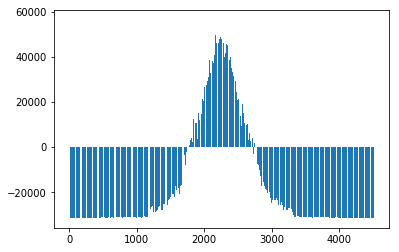

In [72]:
plt.bar(list(range(X_0.shape[1])), X_0.sum(axis = 0))

In [31]:
#X_0_subset_smaller = X_0[:50,:30000]
#X_1_subset = X_1[:5000,:]

In [29]:
X_0 = np.vectorize(lambda x: int(x))(X_0)
#X_0_subset_smaller = np.vectorize(lambda x: int(x))(X_0_subset_smaller)
X_1 = np.vectorize(lambda x: int(x))(X_1)
#X_1_subset = np.vectorize(lambda x: int(x))(X_1_subset)

In [81]:
np.hstack((X_0[:,:], X_1[:,:])).shape

(31458, 6834)

In [95]:
def generate_pairs(X_0, X_1, target_length):
    X = np.zeros((X_0.shape[0], target_length)) #X_0.shape[1] + X_1.shape[1]))
    for i in tqdm(range(X_0.shape[0])):
        
        mismatch = target_length - (X_0.shape[1] + X_1.shape[1])
        
        #print(int(target_length/2) - int(mismatch/2) - (int(target_length/2) + int(mismatch/2)))
        
        X[int(i), int(target_length/2) - int((X_0.shape[1] + X_1.shape[1])/2) :\
                        int(target_length/2) + int((X_0.shape[1] + X_1.shape[1])/2)] \
                            = np.hstack((X_0[i,:], X_1[i,:])) + 1
        
    return X

In [96]:
target_length = 30723

In [97]:
X = generate_pairs(X_0, X_1, target_length = target_length)

In [48]:
#Middle out trimming
#target_length = 30723
X = X[:, (int(X.shape[1]/2) - int(target_length/2)):(int(X.shape[1]/2) + int(target_length/2)) + 1]

In [37]:
#Side trimmming
#target_length = 30723
#X = X[:, :target_length]

In [49]:
X.shape

(31458, 30723)

<BarContainer object of 30723 artists>

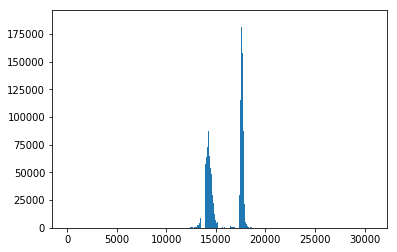

In [98]:
plt.bar(list(range(X.shape[1])), X.sum(axis = 0))

(array([29017.,   438.,   403.,   331.,   216.,    54.,    38.,    48.,
           98.,    80.]),
 array([     0. ,  18684.3,  37368.6,  56052.9,  74737.2,  93421.5,
        112105.8, 130790.1, 149474.4, 168158.7, 186843. ]),
 <a list of 10 Patch objects>)

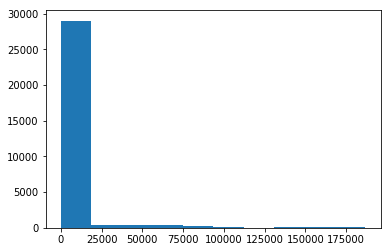

In [58]:
plt.hist(X.sum(axis = 0))

In [102]:
from tensorflow import keras

use_model = keras.models.load_model('models/CNN_GPU_VGG_rebalance.model')

In [103]:
Y

array([[0.2848369],
       [0.2848369],
       [0.2848369]], dtype=float32)

In [104]:
# use_model = keras.models.load_model('models/CNN_GPU_VGG_87p.model')

In [105]:
#Y = use_model.predict(X[..., np.newaxis])

In [126]:
Y = []

for X_sub in tqdm(np.array_split(X,10000)): 
    
    #print(X_sub.shape)
    Y.extend(use_model.predict(X_sub[..., np.newaxis]))

In [129]:
Y = np.array(Y).ravel()

In [134]:
Y.shape

(31458,)

Text(0,0.5,'Number of Pairs')

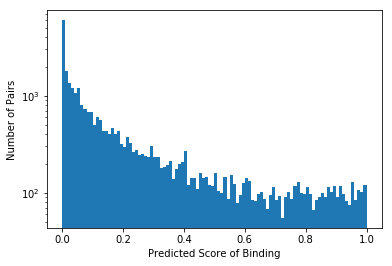

In [131]:
plt.hist(Y, bins = 100, log = True)
plt.xlabel('Predicted Score of Binding')
plt.ylabel('Number of Pairs')

In [135]:
len(np.where(Y > 0.5)[0])/len(Y)

0.1621527115519105

In [132]:
np.where(Y > 0.8)

(array([    7,     8,    32, ..., 30997, 31027, 31028]),)

In [136]:
ndm_df['Y_pred'] = Y

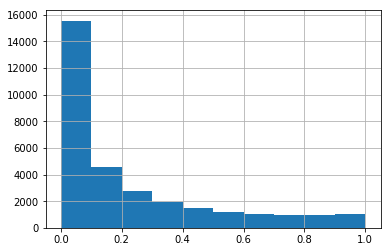

In [137]:
ndm_df['Y_pred'].hist()

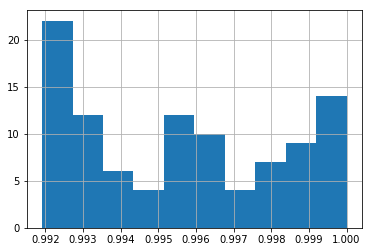

In [149]:
ndm_df.sort_values('Y_pred', ascending = False).iloc[:100]['Y_pred'].hist()

In [153]:
ndm_df.sort_values('Y_pred', ascending = False).iloc[:100].groupby('CHEMBL_id').apply(lambda x: x[['CHEMBL_id', 'gene_name', 'Y_pred']])

,CHEMBL_id,gene_name,Y_pred
7453,CHEMBL41342,FDPS,1.000000
18586,CHEMBL1490403,ATM,1.000000
7452,CHEMBL41342,FDPS,1.000000
1594,CHEMBL9019,AR,1.000000
8456,CHEMBL189362,AR,0.999999
...,...,...,...
20638,CHEMBL117,ALDH2,0.991960
20637,CHEMBL117,ALDH2,0.991960
20634,CHEMBL117,ALDH2,0.991960
20636,CHEMBL117,ALDH2,0.991960


In [158]:
ndm_df.to_pickle('data/NDM_DTC_Predicted_Scores.pkl')